In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'D:/data_science/Research/GroundTruthJSONlog_2.csv')
df.head()

,type,time,sender,attackerType,messageID,pos__001,pos__002,pos__003,pos_noise__001,pos_noise__002,pos_noise__003,spd__001,spd__002,spd__003,spd_noise__001,spd_noise__002,spd_noise__003
0,4,10800.065710,25,0,38,3594.503928,5822.136692,1.895,0.0,0.0,0.0,-0.020621,-35.392890,0.0,0.0,0.0,0.0
1,4,10800.241039,37,0,63,3588.387672,6003.151424,1.895,0.0,0.0,0.0,2.733597,36.816215,0.0,0.0,0.0,0.0
2,4,10800.361496,13,2,88,3584.615626,5891.170606,1.895,0.0,0.0,0.0,1.817582,42.584663,0.0,0.0,0.0,0.0
3,4,10800.502533,43,0,109,3822.766368,5266.901172,1.895,0.0,0.0,0.0,1.118316,-0.847054,0.0,0.0,0.0,0.0
4,4,10800.521696,31,0,130,3820.685635,5264.333061,1.895,0.0,0.0,0.0,0.885788,-0.529247,0.0,0.0,0.0,0.0


In [3]:
df.drop(['type','pos_noise__001','pos_noise__002','pos_noise__003','spd__003','spd_noise__001','spd_noise__002','spd_noise__003'], axis = 1, inplace = True)

In [4]:
x = df[['time','sender','messageID','pos__001','pos__002','pos__003','spd__001','spd__002']]
y = df.iloc[:,2:3].values

In [5]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

Using TensorFlow backend.
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [6]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
#Building Model
from sklearn.neighbors import KNeighborsClassifier
reg = KNeighborsClassifier(n_neighbors = 12)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [9]:

#checking Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.64%


[[238  22]
 [  1 267]]


C:\Users\Jayesh\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1, 'KNN')

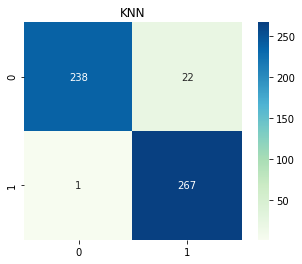

In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
print(con)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
ax.set_title('KNN')

In [11]:
from sklearn.metrics import classification_report
print('KNN')
print(classification_report(y_test, y_pred))

KNN
              precision    recall  f1-score   support

           0       1.00      0.92      0.95       260
           2       0.92      1.00      0.96       268

    accuracy                           0.96       528
   macro avg       0.96      0.96      0.96       528
weighted avg       0.96      0.96      0.96       528



[1.         0.         0.         0.91666667 1.         1.
 1.         1.         1.         1.         0.         0.
 1.         0.         0.         0.         0.75       1.
 0.         0.         0.91666667 0.66666667 0.5        1.
 1.         0.91666667 1.         0.         0.         0.
 0.91666667 1.         0.58333333 0.91666667 1.         1.
 1.         0.         0.         0.41666667 0.         0.
 1.         1.         1.         1.         0.         1.
 1.         0.         0.83333333 0.         1.         1.
 0.         1.         0.         0.91666667 1.         1.
 0.         1.         0.         1.         0.         0.
 0.91666667 0.         0.66666667 0.         0.         0.
 1.         0.         0.         0.         1.         0.
 0.91666667 1.         0.16666667 0.         0.         1.
 0.         1.         0.91666667 0.66666667 1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         0.         0.         1.         

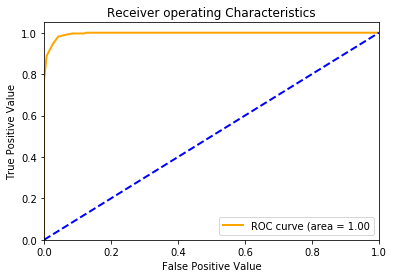

In [12]:
#ROC and AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_probs = reg.predict_proba(x_test)
clf_probs = clf_probs[:,1]
print(clf_probs)
ras = roc_auc_score(y_test,clf_probs)
print("Logistic : ROC AUC = %.3f" %(ras))
from sklearn.preprocessing import label_binarize
y = label_binarize(y_test,classes = [0,2])
n_classes = y.shape[1]
fpr,tpr,_ = roc_curve(y,clf_probs)
plt.figure()
lw = 2
plt.plot(fpr,tpr, color = "orange", lw = lw, label = "ROC curve (area = %0.2f" % ras)
plt.plot([0,1],[0,1], color = "blue",lw = lw, linestyle = '--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Value')
plt.ylabel('True Positive Value')
plt.title('Receiver operating Characteristics')
plt.legend(loc = "lower right")
plt.show()